In [1]:
# BY KARNESHWAR SANNAMNAI 
# TASK 2 - PREDICTION USING UNSUPERVISED ML
# From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [2]:
# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt

In [4]:
# Loading Data

In [5]:
df=pd.read_csv("Iris.csv")

In [6]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# Data Preprocessing

In [8]:
x=df.iloc[:,1:5].values

In [9]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
# Elbow Method ( To determine optimum number of clusters )

In [11]:
from sklearn.cluster import KMeans
k_range=range(1,11)
sse=[]
for k in k_range :
    km=KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)

C:\Users\Karneshwar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Sum of squared error')

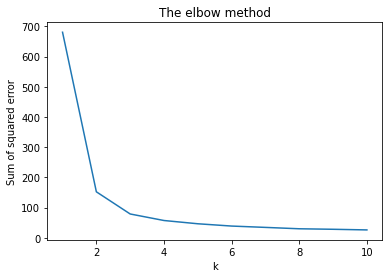

In [12]:
plt.title('The elbow method')
plt.plot(k_range,sse)
plt.xlabel("k")
plt.ylabel("Sum of squared error")

In [13]:
# From the above graph of 'Sum of squared error' vs 'k' , we can see that the the elbow occurs at k=3 . So the optimum number of clusters is 3 .

In [14]:
# Model Training

In [15]:
km=KMeans(n_clusters=3)
predictions=km.fit_predict(x)

In [16]:
# Visualising Clusters

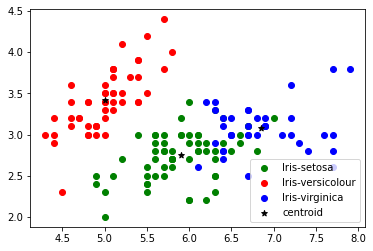

In [17]:
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], color = 'green', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], color = 'red', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1],color = 'blue', label = 'Iris-virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black",marker="*",label="centroid")
plt.legend()